https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="http://chemmaks.pl/Tutoriale/SVM1.png")

## Czym jest SVM?


\begin{align*}
f(x) = sign(w * x + b)
\end{align*}

### Hinge loss

\begin{align*}
loss = max(0,1 - y_{i}(w * x_{i}-b))
\end{align*}

### Funkcja kosztu

Im wieksz C, tym mniej zmieniają się wagi

\begin{align*}
J(w,b) = \frac{1}{2} ||w||^{2} + C \frac{1}{n} \sum_{i=1}^{n} max(0,1 - y_{i} (w * x_{i}-b))
\end{align*}

### Spadek gradientu

Dla
$
\begin{align}
y_{i} * f(x) \geq 1
\end{align} 
$
, czyli sytuacji, gdzie label przewidywany jest poprawnie predykcjonowany

\begin{align*}
dw = \frac{dJ_{i}}{dw_{i}} =   w_{i}
\end{align*}

\begin{align*}
db = \frac{dJ_{i}}{db_{i}} = 0
\end{align*}


W przypadku gdy powyższe równanie nie jest spełnione

\begin{align*}
dw = \frac{dJ_{i}}{dw_{i}} =   w_{i} - C * y_{i} * x_{i}
\end{align*}

\begin{align*}
db = \frac{dJ_{i}}{db_{i}} = y_{i}
\end{align*}

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.8)

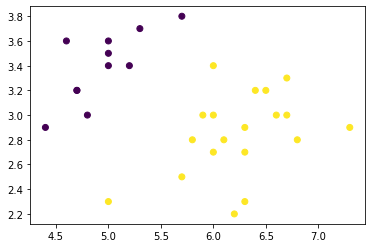

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1], c = y_train)

x = x_train
y = y_train

In [4]:
liczba_probek, liczba_cech = x.shape

krok = 0.001
parametr_C =6
iteracje = 100
wagi = np.zeros(liczba_cech)
bias = 0



In [5]:
y_svm = np.where(y == 0, -1, 1)

In [6]:
for _ in range(iteracje):
    for idx, x_i in enumerate(x):
        condition = y_svm[idx] * (np.dot(x_i, wagi) - bias) >= 1
        if condition:
            wagi = wagi
        else:
            wagi -= krok * (wagi - parametr_C * np.dot(x_i, y_svm[idx]))
            bias -= krok * y_svm[idx]

In [7]:
predykcja = np.sign(np.dot(x_test, wagi) - bias)

## Predykcja

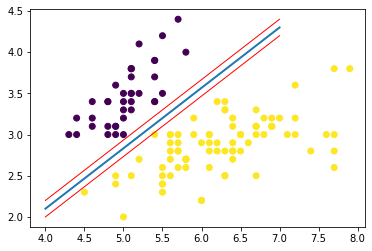

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1], c = predykcja)


plt.plot(np.linspace(4,7,100),np.linspace(4,6.2,100)-1.9, linewidth = 2)
plt.plot(np.linspace(4,7,100),np.linspace(4,6.2,100)-1.8, linewidth = 1, c="red")
plt.plot(np.linspace(4,7,100),np.linspace(4,6.2,100)-2.0, linewidth = 1, c="red")

## Prawdziwe wartosci

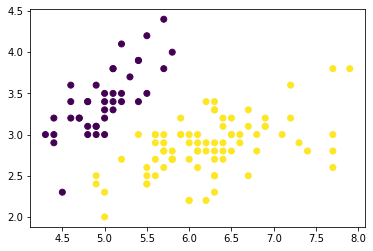

In [318]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1], c = y_test)